# Drawing annotations using stackivew
In this notebook we use `stackview.annotate` to create a label image with manual annotations.

In [1]:
import stackview

import numpy as np
from skimage.data import cells3d

The cells3d dataset from scikit-image serves as example image. One of the two channels shown nuclei.

StackViewNDArray([[[5311, 4458, 5880, ..., 4220, 6497, 4932],
                   [4078, 4552, 3557, ..., 4552, 4884, 5169],
                   [3414, 5074, 4363, ..., 4078, 6117, 5406],
                   ...,
                   [3983, 3983, 2750, ..., 4410, 4600, 5880],
                   [3604, 4173, 4600, ..., 5548, 5690, 4268],
                   [4078, 4268, 4220, ..., 5359, 6686, 7492]],

                  [[4220, 4932, 5074, ..., 6449, 6117, 4932],
                   [3082, 4979, 4505, ..., 4505, 6971, 5880],
                   [4695, 4315, 4695, ..., 4742, 5785, 5074],
                   ...,
                   [3414, 3841, 3462, ..., 5169, 4742, 5027],
                   [4173, 3319, 2798, ..., 5406, 4600, 4837],
                   [3225, 3557, 3651, ..., 5453, 5406, 4837]],

                  [[4552, 4505, 4742, ..., 4458, 4979, 4647],
                   [3367, 4268, 4647, ..., 6402, 6022, 5738],
                   [3509, 3272, 4647, ..., 5264, 4220, 6259],
                   ...,
                   [3841, 3936, 3888, ..., 4884, 5169, 4789],
                   [3604, 3225, 2798, ..., 4552, 6117, 5690],
                   [4126, 4458, 4837, ..., 5928, 6734, 5027]],

                  ...,

                  [[5121, 5833, 5738, ..., 5406, 3983, 4220],
                   [5311, 5453, 5453, ..., 5169, 5027, 4884],
                   [6544, 5121, 5264, ..., 4363, 5406, 4695],
                   ...,
                   [4884, 2324, 3130, ..., 4552, 4979, 6070],
                   [3225, 2513, 2513, ..., 4742, 3035, 2418],
                   [3272, 2798, 3888, ..., 3604, 4268, 3746]],

                  [[5359, 5928, 5738, ..., 4268, 4505, 4031],
                   [7445, 6829, 4268, ..., 4884, 5596, 3082],
                   [6497, 6544, 4932, ..., 3604, 5359, 4410],
                   ...,
                   [5833, 2703, 3367, ..., 3177, 4220, 4220],
                   [4031, 3509, 5216, ..., 4268, 3604, 4932],
                   [3557, 2987, 3936, ..., 3604, 3462, 5264]],

                  [[6402, 6781, 4789, ..., 5928, 6022, 3651],
                   [4363, 4837, 6307, ..., 4315, 3651, 4126],
                   [4979, 4695, 4742, ..., 4789, 4837, 4552],
                   ...,
                   [4078, 2513, 3035, ..., 1849, 3888, 4363],
                   [3936, 3888, 4315, ..., 5216, 4031, 5643],
                   [4173, 4505, 3794, ..., 4979, 6781, 4031]]],
                 dtype=uint16)
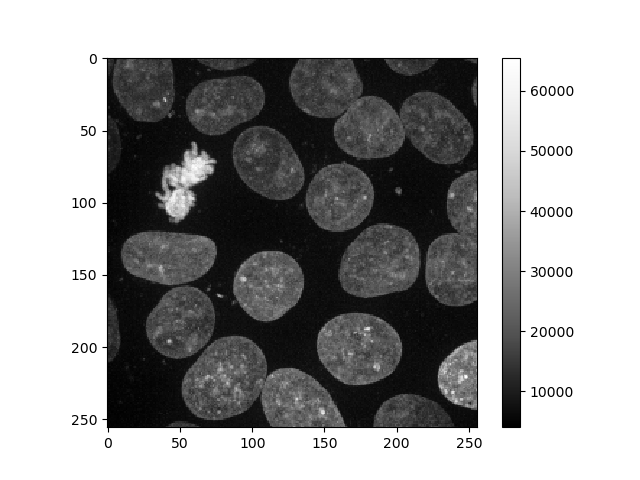
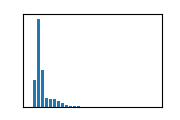

In [2]:
image = cells3d()[:,1]

stackview.insight(image)

Before annotating the nuclei, we create an empty label image of type unsigned 32-bit integer. This type is necessary so that stackview views the image correctly as labels. Compatible types are: `int32`,`uint32`,`int64`,`uint64`.

In [3]:
labels = np.zeros(image.shape).astype(np.uint32)

The function `stackview.annotate` creates a user interface where we can draw labels on top of the original image. Click and drag for drawing. Hold the `ALT` key for erasing.

In [4]:
stackview.annotate(image, labels)

You can also annotate in a different plane than the Z-plane by providing an axis (0=z,1=y,2=x).

In [ ]:
stackview.annotate(image, labels, axis=1)

Once annotations are drawn, we can view them as usual using the `insight()` function.

In [ ]:
stackview.insight(labels)

Just for fun we use the [apoc](https://github.com/haesleinhuepf/apoc) library to create an instance segmentation of nuclei from our annotation.

In [ ]:
import apoc

segmenter = apoc.ObjectSegmenter(positive_class_identifier=1)
features = apoc.PredefinedFeatureSet.small_quick.value

segmenter.train(image=image, ground_truth=labels, features=features)
result = segmenter.predict(image)

stackview.insight(result[30])